In [8]:
from pandas import DataFrame
import pandas as pd
import numpy as np
from Bio import Entrez 
import pycurl
import matplotlib.pyplot as plt
import os, sys

In [9]:
def get_GenomeAssembly(G, S):
    F = G+'_'+S+'.csv'
    if not os.path.isfile(F):
        with open(F, 'wb') as f:
            c = pycurl.Curl()
            c.setopt(c.URL, 'https://www.ncbi.nlm.nih.gov/genomes/Genome2BE/genome2srv.cgi?action=download&orgn=%22'
                     +G+'%20'+S+
                     '%22[orgn]&status=50|40||30|20&report=proks&group=--%20All%20Prokaryotes%20--&subgroup=--%20All%20Prokaryotes%20--&format=csv')
            c.setopt(c.WRITEDATA, f)
            c.perform()
            c.close()
    return F

In [2]:
#Pilih data dari Sebaceous
df1 = pd.read_csv("Byrd_2018_Bacteria.csv")
df2 = df1.loc[:,'Sebaceous']
df2

0               Propionibacterium acnes
1            Staphylococcus epidermidis
2    Corynebacterium tuberculostearicum
3                Staphylococcus capitis
4              Corynebacterium simulans
5                   Streptococcus mitis
6                Staphylococcus hominis
7           Corynebacterium aurimucosum
8        Corynebacterium kroppenstedtii
9            Corynebacterium amycolatum
Name: Sebaceous, dtype: object

# Genome Scraping for Propionibacterium acnes

In [4]:
#Email for NCBI
Entrez.email = "matin_nuhamunada@mail.ugm.ac.id"
handle = Entrez.esearch(db="genome", term=df2[0])
record = Entrez.read(handle)
print(record['IdList'])
print(record['QueryTranslation'])

['1140']
"Cutibacterium acnes"[Organism]


In [9]:
get_GenomeAssembly('Cutibacterium', 'acnes')

'Cutibacterium_acnes.csv'

In [13]:
df3 = pd.read_csv('Cutibacterium_acnes.csv')
df3

,#Organism/Name,Strain,CladeID,BioSample,BioProject,Group,SubGroup,Assembly,Size (Mb),GC%,Replicons,WGS,Scaffolds,Genes,Proteins,Release Date,Modify Date,Level,RefSeq FTP,GenBank FTP
0,Cutibacterium acnes KPA171202,KPA171202,20872,SAMN02603281,PRJNA12460,Terrabacteria group,Actinobacteria,GCA_000008345.1,2.56026,60.0000,chromosome:NC_006085.1/AE017283.1,-,1,2565,2416,2004/07/30,2017/03/29,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
1,Cutibacterium acnes SK137,SK137,20872,SAMN00000718,PRJNA31005,Terrabacteria group,Actinobacteria,GCA_000025765.1,2.49533,60.1000,chromosome:NC_014039.1/CP001977.1,-,1,2525,2390,2010/03/23,2017/03/30,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
2,Cutibacterium acnes 266,266,20872,SAMN02603263,PRJNA56091,Terrabacteria group,Actinobacteria,GCA_000213155.1,2.49458,60.0000,chromosome:NC_017534.1/CP002409.1,-,1,2512,2370,2011/05/11,2017/03/30,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
3,Cutibacterium acnes 6609,6609,20872,SAMN02602996,PRJNA66845,Terrabacteria group,Actinobacteria,GCA_000217615.1,2.56028,60.0000,chromosome:NC_017535.1/CP002815.1,-,1,2561,2411,2011/06/08,2017/03/30,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
4,Cutibacterium acnes subsp. defendens ATCC 11828,ATCC 11828,20872,SAMN02602997,PRJNA73675,Terrabacteria group,Actinobacteria,GCA_000231215.1,2.48863,60.0000,chromosome:NC_017550.1/CP003084.1,-,1,2477,2259,2011/10/20,2018/01/11,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
5,Cutibacterium acnes TypeIA2 P.acn33,P.acn33,20872,SAMN02602998,PRJNA76699,Terrabacteria group,Actinobacteria,GCA_000240015.1,2.48962,60.0000,chromosome:NC_016516.1/CP003195.1,-,1,2500,2358,2011/12/23,2018/01/11,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
6,Cutibacterium acnes TypeIA2 P.acn17,P.acn17,20872,SAMN02602999,PRJNA76701,Terrabacteria group,Actinobacteria,GCA_000240035.1,2.52289,60.1000,chromosome:NC_016512.1/CP003196.1,-,1,2541,2398,2011/12/23,2018/01/11,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
7,Cutibacterium acnes TypeIA2 P.acn31,P.acn31,20872,SAMN02603000,PRJNA76703,Terrabacteria group,Actinobacteria,GCA_000240055.1,2.49877,60.0000,chromosome:NC_016511.1/CP003197.1,-,1,2514,2374,2011/12/23,2018/01/11,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
8,Cutibacterium acnes C1,C1,20872,SAMN02604070,PRJNA175596,Terrabacteria group,Actinobacteria,GCA_000302515.1,2.51900,60.1000,chromosome:NC_018707.1/CP003877.1,-,1,2568,2411,2012/10/03,2017/03/30,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
9,Cutibacterium acnes HL096PA1,HL096PA1,20872,SAMN02604074,PRJNA81129,Terrabacteria group,Actinobacteria,GCA_000376705.1,2.54977,60.1523,chromosome:NC_021085.1/CP003293.1; plasmid unn...,-,2,2593,2455,2013/04/22,2017/04/01,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...


In [80]:
#Filter by "Organism/Name", "Strain", "Size(Mb)", "GC%", "Replicons", "Level"
df4 = df3.loc[:,'Replicons']
df4[9]

'chromosome:NC_021085.1/CP003293.1; plasmid unnamed:NC_021086.1/CP003294.1'

In [85]:
df_Complete = df3[df3['Level'].str.contains("Complete Genome")]
df_Complete = df_Complete[['#Organism/Name','Strain', 'Size (Mb)', 'GC%', 'Replicons', 'Level', 'Genes', 'Proteins']]

In [91]:
df_Complete.head(n=2)

df_Complete.loc[:, 'Genes'] = df_Complete.loc[:, 'Genes'].astype(int)
df_Complete.loc[:, 'Proteins'] = df_Complete.loc[:, 'Proteins'].astype(int)

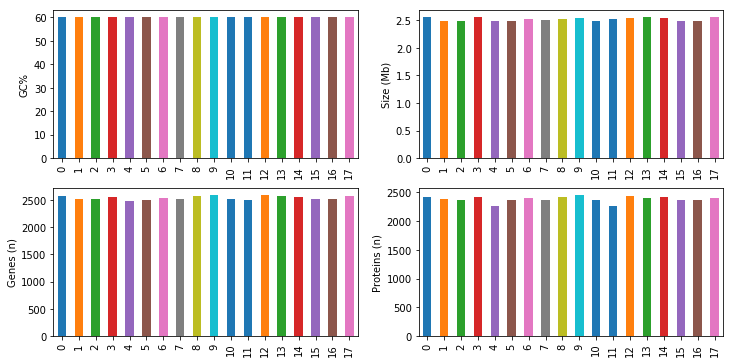

In [121]:
%matplotlib inline

f = plt.figure(figsize=(12,6))
f.
f.add_subplot(221)
df_Complete.loc[:, 'GC%'].plot(kind='bar')
plt.ylabel('GC%')

f.add_subplot(222)
df_Complete.loc[:, 'Size (Mb)'].plot(kind='bar')
plt.ylabel('Size (Mb)')

f.add_subplot(223)
df_Complete.loc[:, 'Genes'].plot(kind='bar')
plt.ylabel('Genes (n)')

f.add_subplot(224)
df_Complete.loc[:, 'Proteins'].plot(kind='bar')
plt.ylabel('Proteins (n)')

plt.show()


# Genome Scraping for S. epidermidis

In [4]:
#Email for NCBI
Entrez.email = "matin_nuhamunada@mail.ugm.ac.id"
handle = Entrez.esearch(db="genome", term=df2[1])
record = Entrez.read(handle)
record

{'Count': '1', 'RetMax': '1', 'RetStart': '0', 'IdList': ['155'], 'TranslationSet': [{'From': 'Staphylococcus epidermidis', 'To': '"Staphylococcus epidermidis"[Organism] OR Staphylococcus epidermidis[All Fields]'}], 'TranslationStack': [{'Term': '"Staphylococcus epidermidis"[Organism]', 'Field': 'Organism', 'Count': '1', 'Explode': 'Y'}, {'Term': 'Staphylococcus epidermidis[All Fields]', 'Field': 'All Fields', 'Count': '1', 'Explode': 'N'}, 'OR', 'GROUP'], 'QueryTranslation': '"Staphylococcus epidermidis"[Organism] OR Staphylococcus epidermidis[All Fields]'}

In [5]:
print(record['IdList'])
print(record['QueryTranslation'])

['155']
"Staphylococcus epidermidis"[Organism] OR Staphylococcus epidermidis[All Fields]


In [10]:
get_GenomeAssembly('Staphylococcus', 'epidermidis')

'Staphylococcus_epidermidis.csv'

In [21]:
df3 = pd.read_csv('Staphylococcus_epidermidis.csv')
df3.head(n=5)

,#Organism/Name,Strain,CladeID,BioSample,BioProject,Group,SubGroup,Assembly,Size (Mb),GC%,Replicons,WGS,Scaffolds,Genes,Proteins,Release Date,Modify Date,Level,RefSeq FTP,GenBank FTP
0,Staphylococcus epidermidis ATCC 12228,ATCC 12228,19993,SAMN02603126,PRJNA279,Terrabacteria group,Firmicutes,GCA_000007645.1,2.56461,32.0512,chromosome:NC_004461.1/AE015929.1; plasmid pSE...,-,7,2558,2482,2002/12/20,2016/08/03,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
1,Staphylococcus epidermidis RP62A,RP62A,19993,SAMN02603975,PRJNA64,Terrabacteria group,Firmicutes,GCA_000011925.1,2.64384,32.1969,chromosome:NC_002976.3/CP000029.1; plasmid pSE...,-,2,2625,2462,2002/01/09,2017/03/22,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
2,Staphylococcus epidermidis PM221,PM221,19993,SAMEA3139103,PRJEB5186,Terrabacteria group,Firmicutes,GCA_000751035.1,2.59751,31.9340,chromosome I:NZ_HG813242.1/HG813242.1; plasmid...,-,5,2589,2399,2014/08/14,2017/03/24,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
3,Staphylococcus epidermidis,SEI,19993,SAMN02928813,PRJNA244351,Terrabacteria group,Firmicutes,GCA_000759555.1,2.53831,32.0287,chromosome:NZ_CP009046.1/CP009046.1; plasmid u...,-,2,2504,2311,2014/09/29,2017/03/24,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
4,Staphylococcus epidermidis,14.1.R1,19993,SAMN06167133,PRJNA358169,Terrabacteria group,Firmicutes,GCA_001956655.2,2.62533,32.1779,CP018841.1; chromosome:NZ_CP018842.1/CP018842....,-,4,2635,2386,2017/01/05,2018/02/05,Complete Genome,-,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...


In [22]:
df_Complete_2 = df3[df3['Level'].str.contains("Complete Genome")]
df_Complete_2 = df_Complete_2[['#Organism/Name','Strain', 'Size (Mb)', 'GC%', 'Replicons', 'Level', 'Genes', 'Proteins']]

In [23]:
df_Complete_2.head(n=2)

df_Complete_2.loc[:, 'Genes'] = df_Complete_2.loc[:, 'Genes'].astype(int)
df_Complete_2.loc[:, 'Proteins'] = df_Complete_2.loc[:, 'Proteins'].astype(int)

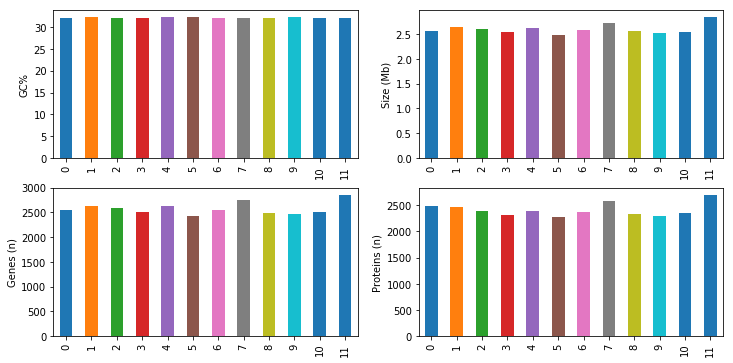

In [24]:
%matplotlib inline

f = plt.figure(figsize=(12,6))

f.add_subplot(221)
df_Complete_2.loc[:, 'GC%'].plot(kind='bar')
plt.ylabel('GC%')

f.add_subplot(222)
df_Complete_2.loc[:, 'Size (Mb)'].plot(kind='bar')
plt.ylabel('Size (Mb)')

f.add_subplot(223)
df_Complete_2.loc[:, 'Genes'].plot(kind='bar')
plt.ylabel('Genes (n)')

f.add_subplot(224)
df_Complete_2.loc[:, 'Proteins'].plot(kind='bar')
plt.ylabel('Proteins (n)')

plt.show()
